In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

# autograd Example

In [4]:
x = torch.tensor(1., requires_grad = True)
w = torch.tensor(2., requires_grad= True)
b = torch.tensor(3., requires_grad=True)
# build a computational graph
y = w * x + b
# compute gradients
y.backward()
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


In [5]:
x = torch.randn(10,3)
y = torch.randn(10,2)
linear = nn.Linear(3,2)
print('w: ', linear.weight)
print('b: ', linear.bias)

('w: ', Parameter containing:
tensor([[ 0.3764, -0.2433, -0.0504],
        [ 0.0975, -0.2377, -0.3841]]))
('b: ', Parameter containing:
tensor([ 0.2371,  0.1967]))


In [6]:
# build loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)
# forward pass
pred = linear(x)
# compute loss
loss = criterion(pred,y)
print('loss: ', loss.item())
# backward pass
loss.backward()
print('dL/dw: ', linear.weight.grad)
print('dL/db: ', linear.bias.grad)
# 1-step gradient descent
optimizer.step()
pred = linear(x)
loss = criterion(pred,y)
print('loss after 1 step optimization: ', loss.item())


('loss: ', 1.1063965559005737)
('dL/dw: ', tensor([[-0.1398, -0.0688, -0.3956],
        [ 0.1336, -0.3011, -0.2467]]))
('dL/db: ', tensor(1.00000e-02 *
       [-6.7953,  5.9768]))
('loss after 1 step optimization: ', 1.1028287410736084)


# Loading data from numpy

In [7]:
x = np.array([[1,2],[3,4]])
y = torch.from_numpy(x)
z = y.numpy()
print(type(y), type(z))

(<class 'torch.Tensor'>, <type 'numpy.ndarray'>)


# Linear regression

In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001
# toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [11]:
# Linear regression model
model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [12]:
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1)%5 == 0:
        print('Epoch [{}/{}], Loss {:.4f}'.format(epoch+1, num_epochs, loss))

Epoch [5/60], Loss 4.4309
Epoch [10/60], Loss 1.9027
Epoch [15/60], Loss 0.8785
Epoch [20/60], Loss 0.4636
Epoch [25/60], Loss 0.2955
Epoch [30/60], Loss 0.2273
Epoch [35/60], Loss 0.1997
Epoch [40/60], Loss 0.1885
Epoch [45/60], Loss 0.1840
Epoch [50/60], Loss 0.1821
Epoch [55/60], Loss 0.1813
Epoch [60/60], Loss 0.1810


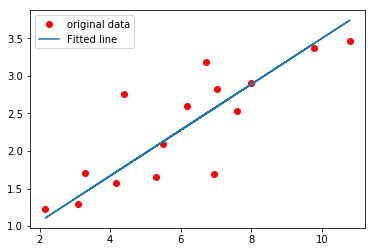

In [14]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train,y_train, 'ro', label='original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()